In [1]:
import pandas as pd

# Load the dataset using bank-full.csv
df = pd.read_csv('bank-full.csv', sep=';')

# Display the first few rows
print(df.head())

# Display dataset information
print(df.info())

# Check for missing values
print(df.isnull().sum())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [5]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [7]:
from sklearn.metrics import accuracy_score, classification_report

# Predict using the test set
y_pred = dt_classifier.predict(X_test)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.87
              precision    recall  f1-score   support

       False       0.93      0.92      0.93     11977
        True       0.44      0.46      0.45      1587

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



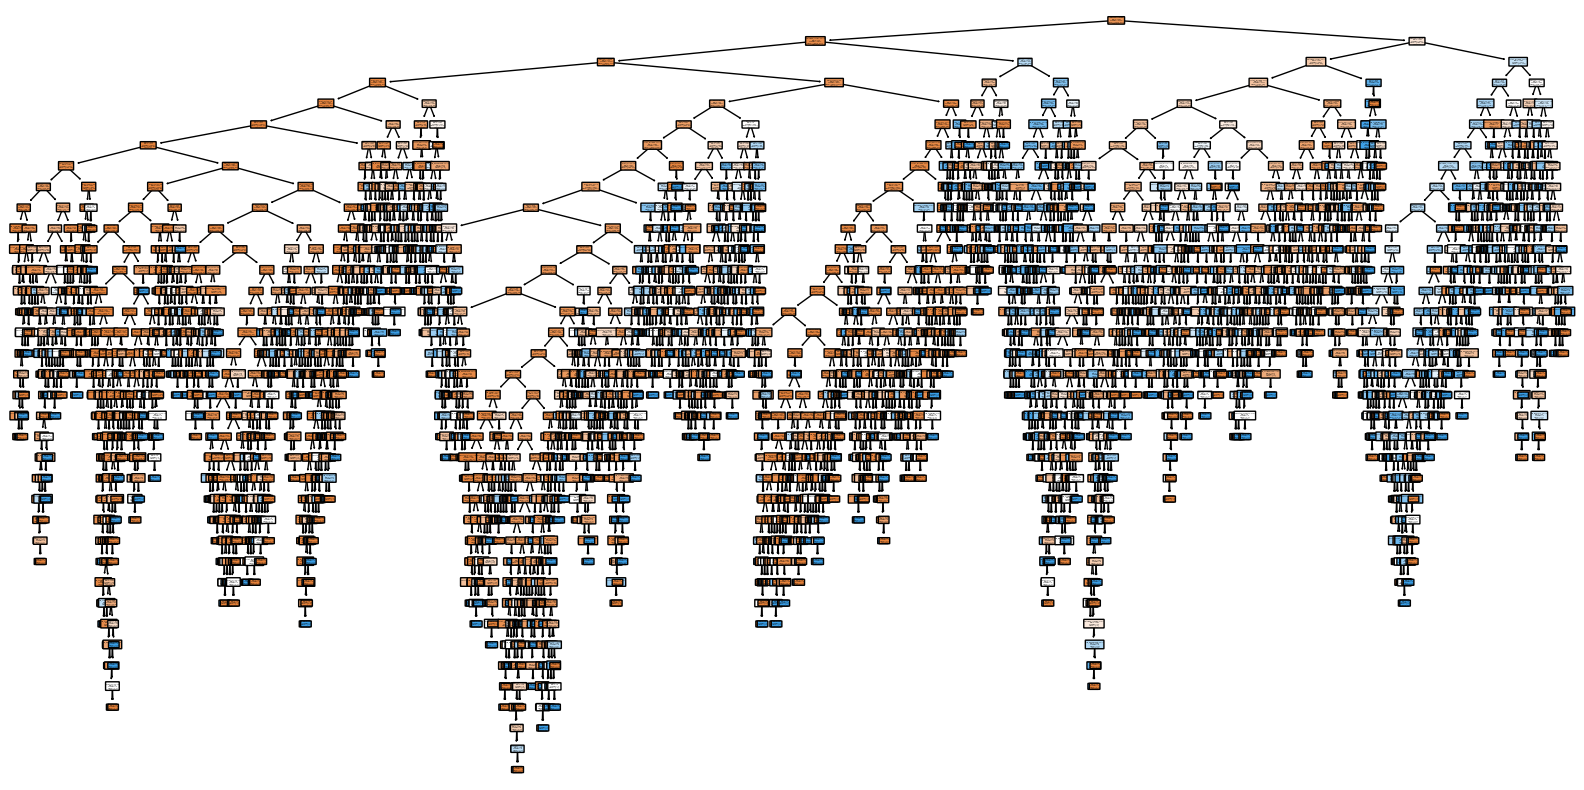

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()
